# Implementing a 'deep' Neural Network in Python
    
    Implementation follows example at:
    https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

In [1]:
# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

import pandas as pd
import tensorflow.keras

# All of the Keras datasets are in keras.datasets
from tensorflow.keras.datasets import fashion_mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Training images is a list of 60,000 2D tensors.
# Each 2D tensor is 28 by 28.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])

60000 (28, 28)
60000 9


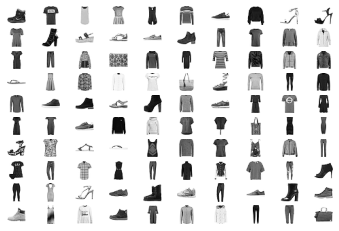

In [2]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')

In [4]:
from tensorflow.keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# [
#     [1,2,3]
#     [4,5,6]
# ]

# => [1,2,3,4,5,6]

# Just showing the changes...
print("training data: ", training_images.shape, " ==> ", training_data.shape)
print("test data: ", test_images.shape, " ==> ", test_data.shape)

training data:  (60000, 28, 28)  ==>  (60000, 784)
test data:  (10000, 28, 28)  ==>  (10000, 784)


In [5]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [6]:
# Recall that before this transformation, training_labels[0] was the value 5. Look now:
print(training_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [8]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5


InternalError: Graph execution error:

Detected at node 'sequential/dense/MatMul' defined at (most recent call last):
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\lance\AppData\Local\Temp\ipykernel_18312\2954891304.py", line 9, in <cell line: 9>
      history = model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lance\anaconda3\envs\AFIT\lib\site-packages\keras\layers\core\dense.py", line 221, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/dense/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_train_function_514]

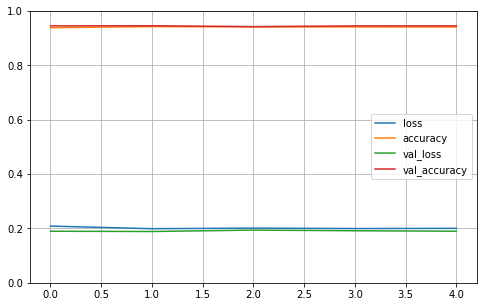

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #sets vertical range to [0,1]
plt.show()
